### TV SHOW ANALYSIS A DATA MINING PROJECT

In [1]:
#importing the libraries
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

In [2]:
#Reading the data
dataset = pd.read_csv('C:\\Users\\91944\\Desktop\\newdataset.csv')

In [3]:
#Performing labelling for data
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
dataset['TV show']=number.fit_transform(dataset['TV show'].astype('str'))
X = dataset.iloc[:, [1,6]].values
y = dataset.iloc[:, 8].values

### Splitting the dataset into the Training set and Test set


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_test)

[[30.   3. ]
 [10.   3. ]
 [54.   4.6]
 [38.   4. ]
 [31.   3.4]
 [60.   4. ]
 [ 0.   4. ]
 [13.   4.1]
 [44.   4.5]
 [69.   3.6]
 [11.   3.5]
 [46.   3.5]
 [29.   2.7]
 [57.   2.9]
 [ 7.   3.2]
 [40.   3.4]
 [18.   4.2]
 [65.   4. ]]


In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Building the model

In [7]:
# Fitting knn classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=4,metric='euclidean',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

### Test Results Prediction

In [8]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1]


### Performing Confusion matrix

[[8 2]
 [2 6]]


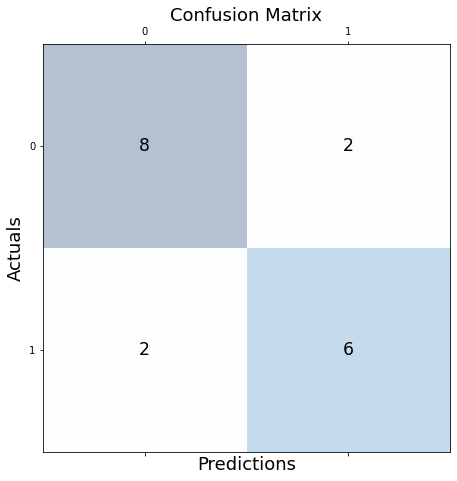

In [12]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
print(cm)

#plotting confusion matrix
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Finding Accuracy

In [13]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

0.7777777777777778



### Visualization of training results

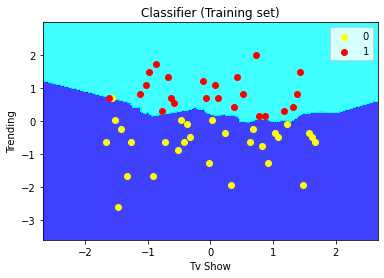

In [14]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step =
0.01),
 np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.75, cmap = ListedColormap(('blue', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ['yellow', 'red'][i], label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Tv Show')
plt.ylabel('Trending')
plt.legend()
plt.show()

### TEST results Visualization

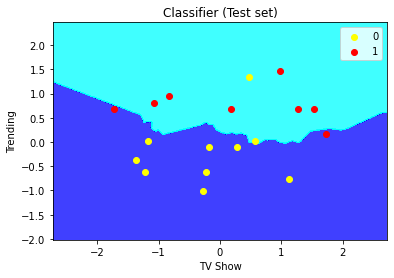

In [15]:

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step =
0.01),
 np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.75, cmap = ListedColormap(('blue', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ['yellow', 'red'][i], label = j)
plt.title('Classifier (Test set)')
plt.xlabel('TV Show')
plt.ylabel('Trending')
plt.legend()
plt.show()